<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Physics-Lab" data-toc-modified-id="Physics-Lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Physics Lab</a></span><ul class="toc-item"><li><span><a href="#Parte-2:--Análise-de-dados-de-um-movimento-acelerado-em-2D" data-toc-modified-id="Parte-2:--Análise-de-dados-de-um-movimento-acelerado-em-2D-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parte 2:  Análise de dados de um movimento acelerado em 2D</a></span></li><li><span><a href="#Configuração" data-toc-modified-id="Configuração-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Configuração</a></span></li><li><span><a href="#Importar-dados" data-toc-modified-id="Importar-dados-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Importar dados</a></span></li><li><span><a href="#Encontrando-as-componentes-da-aceleração" data-toc-modified-id="Encontrando-as-componentes-da-aceleração-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Encontrando as componentes da aceleração</a></span><ul class="toc-item"><li><span><a href="#Ajuste-da-função-para-trajetória-C" data-toc-modified-id="Ajuste-da-função-para-trajetória-C-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Ajuste da função para trajetória C</a></span><ul class="toc-item"><li><span><a href="#Coordenada-x" data-toc-modified-id="Coordenada-x-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>Coordenada x</a></span></li><li><span><a href="#Coordenada-y" data-toc-modified-id="Coordenada-y-1.4.1.2"><span class="toc-item-num">1.4.1.2&nbsp;&nbsp;</span>Coordenada y</a></span></li></ul></li><li><span><a href="#Ajuste-da-função-para-trajetória-R" data-toc-modified-id="Ajuste-da-função-para-trajetória-R-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Ajuste da função para trajetória R</a></span><ul class="toc-item"><li><span><a href="#Coordenada-x" data-toc-modified-id="Coordenada-x-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>Coordenada x</a></span></li><li><span><a href="#Coordenada-y" data-toc-modified-id="Coordenada-y-1.4.2.2"><span class="toc-item-num">1.4.2.2&nbsp;&nbsp;</span>Coordenada y</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Physics Lab

## Parte 2:  Análise de dados de um movimento acelerado em 2D

Nome:  ____

Ra: ___

## Configuração

Você precisará importar os seguintes pacotes.

In [122]:
# pacotes para manipulação dos dados

from numpy import *
import pandas as pd
%matplotlib inline

# pacote para confecção de gráficos para visualizar os resultados
# de uma maneira mais apreciável e criar nossos modelos
import matplotlib.pyplot as plt

# ajustando algumas configurações para melhor visualização dos gráficos
plt.rcParams['font.size'] = 16                           # altera o tamanho das fontes na figura
plt.rcParams['figure.figsize'] = 8, 6                    # altera o tamanho da figura
plt.rcParams['axes.axisbelow'] = True                    # para desenhar os grids atrás das curvas e pontos
for axis in ['xtick', 'ytick']:                          # loop para aplicar as mudanças nos eixos x e y
    plt.rcParams['{}.major.size'.format(axis)] = 10      # altera o tamanho dos ticks maiores
    plt.rcParams['{}.minor.size'.format(axis)] = 5       # altera o tamanho dos ticks menores
    plt.rcParams['{}.minor.visible'.format(axis)] = True # faz os ticks menores ficarem visíveis

Como antes, `numpy` é para python numérico,` pandas` é para importação de dados e `matplotlib` é para criação de gráficos.

Python é uma linguagem de programação orientada a objetos. Essa é uma maneira poderosa de programar, mas, para nossos propósitos, oferece uma maneira conveniente de armazenar dados. Cada "caminho" terá tempo $ t $, posição $ x $ e posição $ y $. A linha a seguir criará uma classe chamada `Path ', que será o modelo para nossos objetos Path.

In [123]:
class Path: pass

Se você estiver curioso, pode aprender mais sobre [object oriented programming](https://searchmicroservices.techtarget.com/definition/object-oriented-programming-OOP) e [Python classes](https://docs.python.org/3/tutorial/classes.html).

##  Importar dados

Siga as instruções do laboratório para criar dois arquivos de planilha `csv`: um para o caminho C e outro para o caminho R.

Use o código a seguir para extrair os locais $ x $ e $ y $ do objeto no momento $ t $.

In [124]:
dataC = pd.read_csv('lab_04-sample_data_C.csv')
dataC.keys()    # this will give us the data column names

Index(['VideoAnalysis: Time (s)', 'VideoAnalysis: X (m)',
       'VideoAnalysis: Y (m)', 'VideoAnalysis: X Velocity (m/s)',
       'VideoAnalysis: Y Velocity (m/s)'],
      dtype='object')

In [125]:
dataC[1:5]

,VideoAnalysis: Time (s),VideoAnalysis: X (m),VideoAnalysis: Y (m),VideoAnalysis: X Velocity (m/s),VideoAnalysis: Y Velocity (m/s)
1,1.266667,0.365109,-0.163177,0.099999,0.281497
2,1.300000,0.367241,-0.151848,0.075230,0.301690
3,1.333333,0.369237,-0.141656,0.076890,0.285549
4,1.366667,0.371768,-0.132564,0.094589,0.263501


In [126]:
dataR = pd.read_csv('lab_04-sample_data_R.csv')
dataR.keys()    # this will give us the data column names

Index(['VideoAnalysis: Time (s)', 'VideoAnalysis: X (m)',
       'VideoAnalysis: Y (m)', 'VideoAnalysis: X Velocity (m/s)',
       'VideoAnalysis: Y Velocity (m/s)'],
      dtype='object')

In [127]:
dataR[1:5]

,VideoAnalysis: Time (s),VideoAnalysis: X (m),VideoAnalysis: Y (m),VideoAnalysis: X Velocity (m/s),VideoAnalysis: Y Velocity (m/s)
1,1.466667,0.367586,0.166839,-0.098979,-0.060788
2,1.500000,0.363713,0.165254,-0.080400,-0.062654
3,1.533333,0.362293,0.162637,-0.062860,-0.064262
4,1.566667,0.360597,0.160735,-0.073035,-0.060576


Precisamos dos dados $ x, y $ e $ t $ para cada caminho.

In [128]:
C = Path()
C.t = dataC['VideoAnalysis: Time (s)'].values      # times in seconds
C.x = dataC['VideoAnalysis: X (m)'].values * 1000  # x-positions, convert m to mm
C.y = dataC['VideoAnalysis: Y (m)'].values * 1000  # y-positions, convert m to mm

In [129]:
R = Path()
R.t = dataR['VideoAnalysis: Time (s)'].values      # times in seconds
R.x = dataR['VideoAnalysis: X (m)'].values * 1000  # x-positions, convert m to mm
R.y = dataR['VideoAnalysis: Y (m)'].values * 1000  # y-positions, convert m to mm

Você precisará importar os dados do caminho R. você mesmo. O código pode ser copiado de cima e colado na célula vazia abaixo e, em seguida, serão necessárias algumas edições menores para definir um objeto `R` e seus dados` R.t`, `R.x` e` R.y`.

Vamos dar uma olhada nos caminhos.

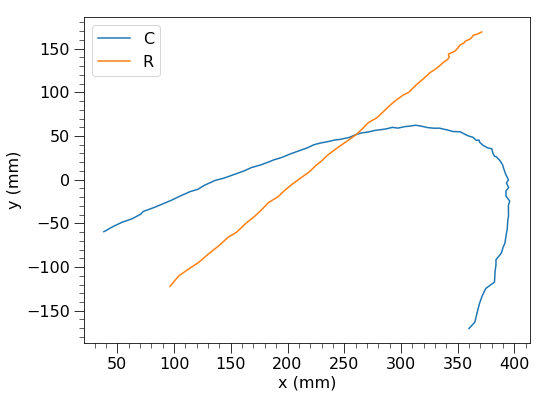

In [130]:
plt.plot(C.x, C.y, label='C')
plt.plot(R.x, R.y, label='R')
#plt.axes().set_aspect('equal')  # Fazer um gráfico com escalas iguais no eixo x e y caso queira

plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.legend()

## Encontrando as componentes da aceleração

Precisamos encontrar quatro acelerações diferentes: $ a_x $ e $ a_y $ para o caminho C e para o caminho R. Cada um pode ser encontrado ajustando uma parábola aos dados. O primeiro destes é feito abaixo; você precisa fazer o mesmo para os outros três.

Você pode querer revisar [last week's lab](lab_03.html) para explicações do procedimento. Buscamos coeficientes do polinômio de segundo grau que melhor se ajustem aos nossos dados $ x (t) $: $ p (t) = A t^2 + B t + C \approx x (t) $.

Fit a parabola to the `x` versus `t` data for path `C`:

### Ajuste da função para trajetória C

#### Coordenada x

In [131]:
(AA,BB,CC),cov = polyfit(C.t,C.x,2,cov=True)
dA,dB,dC = sqrt(diag(cov))    #  get absolute uncertainty
C.ax = 0.5*AA                 # acceleration is 1/2 the coefficient A
C.dax = 0.5*dA                # uncertainty scales linearly with value

Crie um novo objeto Path chamado `fitC` que reterá os dados para os resultados do ajuste.

In [132]:
fitC = Path()
fitC.t = linspace( C.t[0], C.t[-1], 100)    # an array of 100 time values
fitC.x = AA*fitC.t**2 + BB*fitC.t + CC      # evaluate the polynomial at these times

Faça um gráfico para garantir que as coisas estão como o esperado.

Text(0.5, 1.0, 'Trajetória C: Movimento na coordenada $x$')

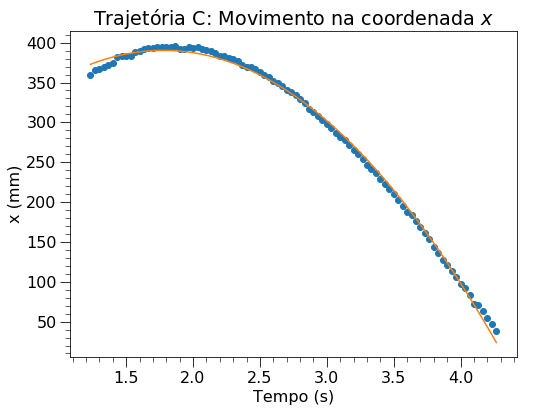

In [134]:
plt.plot(C.t,C.x,'o',label='x-comp')      # plot the data with dots ('o')
plt.plot(fitC.t,fitC.x)                   # plot the parabola with a line
plt.xlabel('Tempo (s)')
plt.ylabel('x (mm)')
plt.title('Trajetória C: Movimento na coordenada $x$')

#### Coordenada y

In [135]:
(TT,WW,ZZ),cov = polyfit(C.t,C.y,2,cov=True)
dT,dW,dZ = sqrt(diag(cov))    #  get absolute uncertainty
C.Ty = 0.5*TT                 # acceleration is 1/2 the coefficient A
C.dTy = 0.5*dT                # uncertainty scales linearly with value

In [136]:
fitC2 = Path()
fitC2.t = linspace( C.t[0], C.t[-1], 100)    # an array of 100 time values
fitC2.y = TT*fitC2.t**2 + WW*fitC2.t + ZZ      # evaluate the polynomial at these times

Text(0.5, 1.0, 'Trajetória C: Movimento na coordenada $Y$')

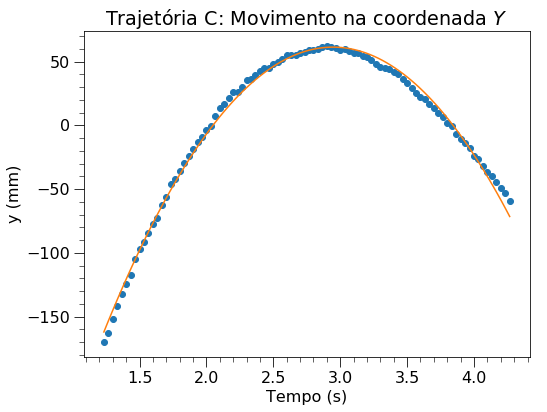

In [137]:
plt.plot(C.t,C.y,'o',label='x dados')      # plot the data with dots ('o')
plt.plot(fitC2.t,fitC2.y,label='Ajuste')                   # plot the parabola with a line
plt.xlabel('Tempo (s)')
plt.ylabel('y (mm)')
plt.title('Trajetória C: Movimento na coordenada $Y$')

### Ajuste da função para trajetória R

#### Coordenada x

In [138]:
(DD,EE,FF),cov = polyfit(R.t,R.x,2,cov=True)
dD,dE,dF = sqrt(diag(cov))    #  get absolute uncertainty
R.Dx = 0.5*DD                # acceleration is 1/2 the coefficient D
R.dDx = 0.5*dD                # uncertainty scales linearly with value

In [139]:
fitR = Path()
fitR.t = linspace( R.t[0], R.t[-1], 100)    # an array of 100 time values
fitR.x = DD*fitR.t**2 + EE*fitR.t + FF      # evaluate the polynomial at these times

Text(0.5, 1.0, 'Trajetória R: Movimento na coordenada $x$')

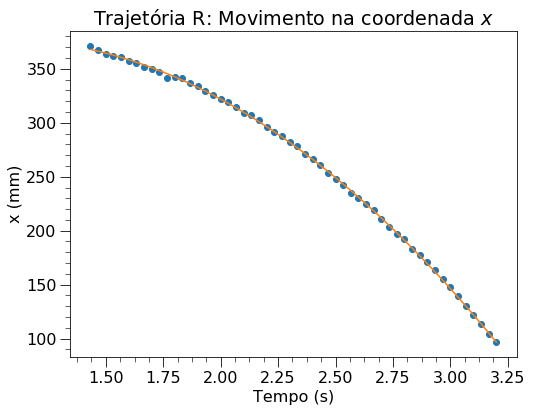

In [140]:
plt.plot(R.t,R.x,'o',label='x-comp')      # plot the data with dots ('o')
plt.plot(fitR.t,fitR.x)                   # plot the parabola with a line
plt.xlabel('Tempo (s)')
plt.ylabel('x (mm)')
plt.title('Trajetória R: Movimento na coordenada $x$')

#### Coordenada y

In [141]:
(KK,JJ,VV),cov = polyfit(R.t,R.y,2,cov=True)
dK,dJ,dV = sqrt(diag(cov))    #  get absolute uncertainty
R.Ky = 0.5*KK                 # acceleration is 1/2 the coefficient K
R.dKy = 0.5*dK                # uncertainty scales linearly with value

In [142]:
fitR2 = Path()
fitR2.t = linspace( R.t[0], R.t[-1], 100)    # an array of 100 time values
fitR2.y = KK*fitR2.t**2 + JJ*fitR2.t + VV      # evaluate the polynomial at these times

Text(0.5, 1.0, 'Trajetória R: Movimento na coordenada $y$')

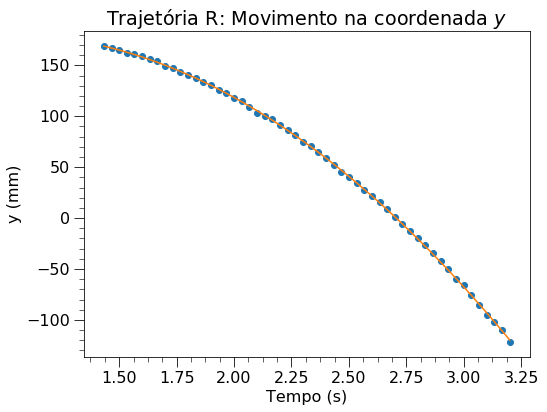

In [143]:
plt.plot(R.t,R.y,'o',label='y-comp')      # plot the data with dots ('o')
plt.plot(fitR2.t,fitR2.y)                   # plot the parabola with a line
plt.xlabel('Tempo (s)')
plt.ylabel('y (mm)')
plt.title('Trajetória R: Movimento na coordenada $y$')

Depois de obter todos os quatro componentes. Relate seus resultados numéricos.

In [144]:
#print('for path C:')
#print('    ax = {:.3f} ± {:.3f} mm/s^2'.format(C.ax,C.dax))
#print('    ay = {:.3f} ± {:.3f} mm/s^2'.format(C.ay,C.day))
#print('for path R:')
#print('    ax = {:.3f} ± {:.3f} mm/s^2'.format(R.ax,R.dax))
#print('    ay = {:.3f} ± {:.3f} mm/s^2'.format(R.ay,R.day))

We will now plot all the data.

We can see all four graphs at once using "subplots". The following code  makes four subplots in one figure.

> You can learn more about `subplot` and other features in the `matplotlib` [tutorial](https://matplotlib.org/tutorials/index.html).

Text(0.5, 0, 'Tempo (s)')

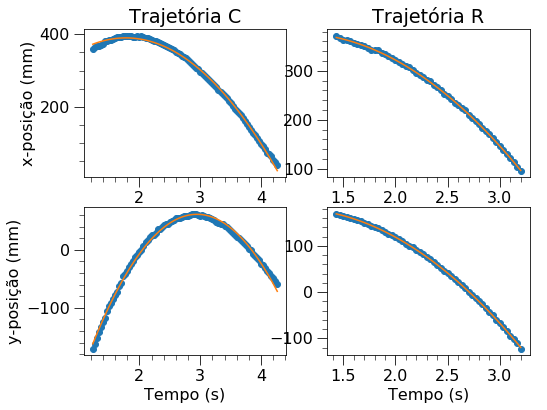

In [155]:
plt.subplot(221)      # 221 means "on a 2x2 grid, plot number 1"
plt.plot(C.t,C.x,'o',label='x movimento')
plt.plot(fitC.t,fitC.x)      
plt.ylabel('x-posição (mm)')
plt.title('Trajetória C')
plt.subplot(222)      # 222 means "on a 2x2 grid, plot number 2"
plt.plot(R.t,R.x,'o',label='x movimento')
plt.plot(fitR.t,fitR.x)                   
plt.title('Trajetória R')
plt.subplot(223)
plt.plot(C.t,C.y,'o',label='y movimento') 
plt.plot(fitC.t,fitC2.y)        
plt.xlabel('Tempo (s)')
plt.ylabel('y-posição (mm)')
plt.subplot(224)
plt.plot(R.t,R.y,'o',label='y movimento') 
plt.plot(fitR.t,fitR2.y)       
plt.xlabel('Tempo (s)')

Encontre a magnitude e a direção dos vetores de aceleração $\vec{a}_C$ e $\vec{a}_R$. 

In [118]:
print('Para a trajetória C:')
print('    a = {:.3f} mm/s^2'.format(sqrt(C.Ty**2+C.ax**2)))
print('    direção = {:.3f} graus'.format( arctan2(C.Ty,C.ax)*180/pi))
print('Para a trajetória R:')
print('    a = {:.3f} mm/s^2'.format(sqrt(R.Ky**2+R.Dx**2)))
print('    direção = {:.3f} graus'.format( arctan2(R.Ky,R.Dx)*180/pi))

Para a trajetória C:
    a = 48.232 mm/s^2
    direção = -127.826 graus
Para a trajetória R:
    a = 43.231 mm/s^2
    direção = -134.137 graus


Você deve verificar se os valores de aceleração estão de acordo um com o outro (dentro da razão) e se o ângulo é o que você esperaria dos caminhos plotados (linha 6, acima).